In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.externals import joblib

In [2]:
# 载入数据
filename = r'/home/liangyu/Python/Data-Competitions/Datacastle/Project1/Data/traindata .csv'
data = pd.read_csv(filename)

In [3]:
# 查看数据
data.head()

,Sex,Length(mm),Diameter(mm),Hight(mm),Whole weight(g),Shucked weight(g),Viscera weight(g),Shell weight(g),Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9


In [12]:
# 大致描述数据
data.describe()

,Length(mm),Diameter(mm),Hight(mm),Whole weight(g),Shucked weight(g),Viscera weight(g),Shell weight(g),Rings
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,0.523859,0.407635,0.139743,0.829562,0.359048,0.180926,0.239140,9.916903
std,0.121137,0.100189,0.042906,0.489861,0.221361,0.109906,0.138078,3.184901
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.807500,0.339000,0.171500,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.500500,0.252500,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,29.000000


特征 **Hight** 的方差明显小于其他特征

In [5]:
# 查看性别种类
data["Sex"].value_counts()

M    1194
I     996
F     987
Name: Sex, dtype: int64

In [14]:
# 相关性分析（皮尔逊相关系数只能衡量特征间的线性相关性）
data.corr(method='pearson')

,Length(mm),Diameter(mm),Hight(mm),Whole weight(g),Shucked weight(g),Viscera weight(g),Shell weight(g),Rings
Length(mm),1.000000,0.986984,0.809646,0.924617,0.898945,0.900550,0.899041,0.561523
Diameter(mm),0.986984,1.000000,0.816762,0.925799,0.894771,0.898487,0.907943,0.582448
Hight(mm),0.809646,0.816762,1.000000,0.800963,0.759337,0.780139,0.799213,0.547659
Whole weight(g),0.924617,0.925799,0.800963,1.000000,0.970514,0.967016,0.955837,0.543639
Shucked weight(g),0.898945,0.894771,0.759337,0.970514,1.000000,0.932883,0.885646,0.426805
Viscera weight(g),0.900550,0.898487,0.780139,0.967016,0.932883,1.000000,0.908389,0.509071
Shell weight(g),0.899041,0.907943,0.799213,0.955837,0.885646,0.908389,1.000000,0.630700
Rings,0.561523,0.582448,0.547659,0.543639,0.426805,0.509071,0.630700,1.000000


In [28]:
# 计算最大信息系数(MIC)
from minepy import MINE

def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return m.mic()

columns_name = data.columns
for i in xrange(1, data.shape[1]):
    for j in xrange(i+1, data.shape[1]):
        mic_ = mic(data[columns_name[i]], data[columns_name[j]])
        print "{}和{}之间的MIC为：{}".format(columns_name[i], columns_name[j], mic_)

Length(mm)和Diameter(mm)之间的MIC为：0.853055207093
Length(mm)和Hight(mm)之间的MIC为：0.607168090003
Length(mm)和Whole weight(g)之间的MIC为：0.841766952996
Length(mm)和Shucked weight(g)之间的MIC为：0.804331470107
Length(mm)和Viscera weight(g)之间的MIC为：0.744485844571
Length(mm)和Shell weight(g)之间的MIC为：0.752555384213
Length(mm)和Rings之间的MIC为：0.35650682918
Diameter(mm)和Hight(mm)之间的MIC为：0.61421388754
Diameter(mm)和Whole weight(g)之间的MIC为：0.836990914897
Diameter(mm)和Shucked weight(g)之间的MIC为：0.783004098218
Diameter(mm)和Viscera weight(g)之间的MIC为：0.743344957692
Diameter(mm)和Shell weight(g)之间的MIC为：0.773409855669
Diameter(mm)和Rings之间的MIC为：0.368450246967
Hight(mm)和Whole weight(g)之间的MIC为：0.707614005068
Hight(mm)和Shucked weight(g)之间的MIC为：0.624890430895
Hight(mm)和Viscera weight(g)之间的MIC为：0.654602539328
Hight(mm)和Shell weight(g)之间的MIC为：0.68514620666
Hight(mm)和Rings之间的MIC为：0.349431662525
Whole weight(g)和Shucked weight(g)之间的MIC为：0.863508822127
Whole weight(g)和Viscera weight(g)之间的MIC为：0.839083652464
Whole weight(g)和Shell weight(g)之间的M

**Shell weight(g)和Rings之间的MIC最高**

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf0179a610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbf013fc9d0>]], dtype=object)

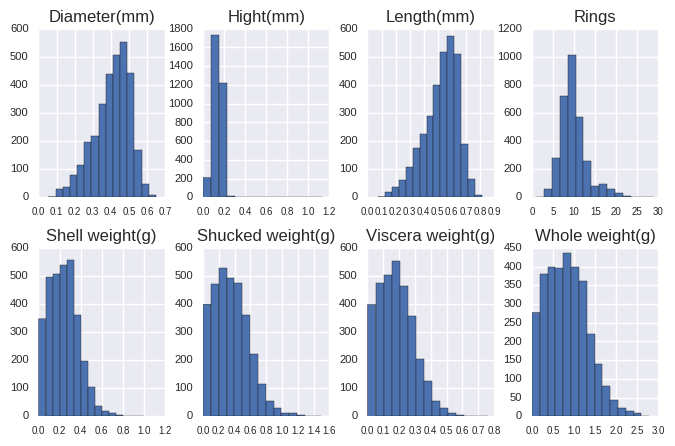

In [40]:
# 直方图
data.hist(xlabelsize=7, ylabelsize=8, figsize=(8,5), layout=(2, 4), bins=15)

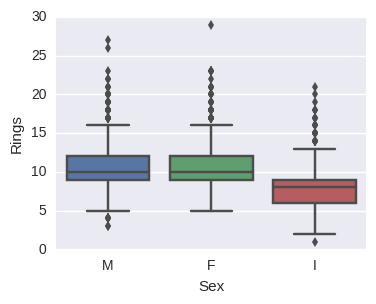

In [61]:
# 箱形图
plt.figure(figsize=(4, 3))
sns.set(style="darkgrid")
sns.boxplot(x="Sex", y="Rings", data=data)

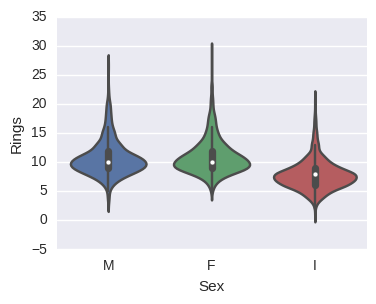

In [62]:
# 吉他图
plt.figure(figsize=(4, 3))
sns.set(style="darkgrid")
sns.violinplot(x="Sex", y="Rings", data=data)

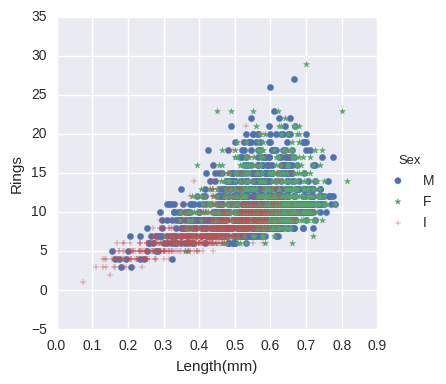

In [84]:
# 用seaborn绘制散点图scatter
sns.set(style="darkgrid",  color_codes=True)
g = sns.FacetGrid(data, hue="Sex", hue_order=["M", "F", "I"], hue_kws=dict(marker=["o", "*", "+"]), size=4)
g.map(plt.scatter, "Length(mm)", "Rings")
g.add_legend()

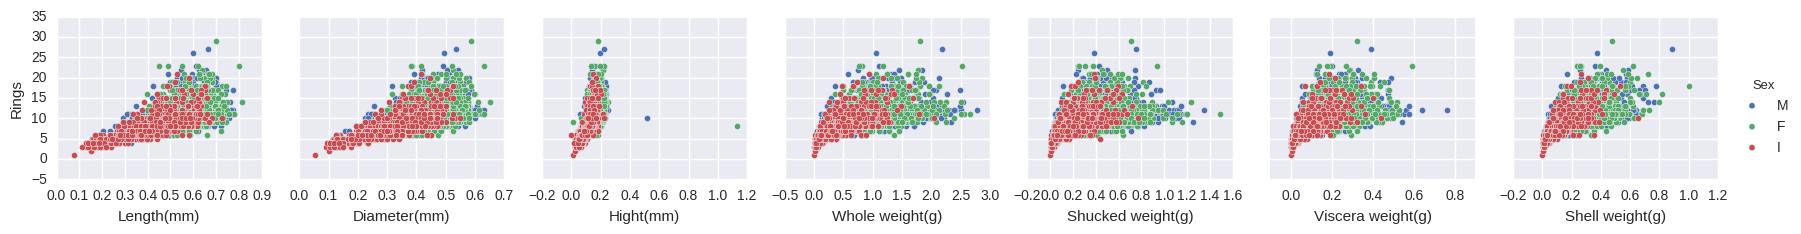

In [89]:
# 绘制散点图，观察因变量与自变量的关系
sns.pairplot(data, y_vars=["Rings"], x_vars=columns_name[1:8], hue="Sex", diag_kind='kde')